# Query Project

<i>
Carlos Sancini<br>
Assignment 5<br>
W205 Introduction to Data Engineering<br>
MIDS Summer 2018</i>    

## Introduction

The objective of this project is to analyze the Bay Area Bike Share Trips dataset to identify opportunities for offers that may increase bike ridership for the Ford GoBike company, which provides this type of transportation service in the Bay Area region. Currently, the company has three pricing options: a flat price for a single one-way trip, a day pass that allows unlimited 30-minute rides for 24 hours and an annual membership.

Data for analysis is publicly available on the Google Cloud Platform (GCP) through the BiqQuery database, which includes three tables containing stations information, travel details between stations, and bike availability for each station. The documentation of tables and fields is available in BigQuery, hence there will be no explanations about them, unless they are necessary for the understanding of a finding.

The specific research questions for the project are:
- What recommendations of offers can be done to increase ridership?
- What are the 5 most popular trips that can be called commuter trips?

The project is structured in three parts. The first contains an executive summary of the main conclusions and offers proposed. The second part contains a detailed step-by-step analysis of the data that led to the main insights. Finally, the conclusion contains considerations for the implementation of the recommendations and for further analysis.

## Executive summary

Offers may be targeted to people that are not current users of the service in San Francisco. Ads could be placed in locations close to busiest bike stations, such public transportation stations. Only the stations San Jose Diridron Caltrain Station (Sao Jose) and Mountain View Caltrain Station (Mountain View) have a moderate audience and are potential targets for ads outside San Francisco.

Discounts could be provided for non-subscribers for trips starting at the early morning. Another option is to provide special discounts for subscribers that take trips starting in the late morning until the mid afternoon.

Longer non-subscriber trips may be correlated with leisure, tourism, or exercise, and for this reason offers could be customized to reach audiences with those types of interest.

Shorter subscriber trips that may be correlated with commuting routes (customers use combined transportation by bike and train/boat). A communication strategy around wellness through short exercises combined with deals targeted to non-customers, could be effective as people would not need to change their routines too much to start using the service.

The most popular commuter trips are concentrated in San Francisco between the following stations:
- San Francisco Caltrain 2 (330 Townsend) **<>** Townsend at 7th
- 2nd at Townsend **<>** Harry Bridges Plaza (Ferry Building)
- Steuart at Market **<>** 2nd at Townsend
- San Francisco Caltrain (Townsend at 4th) **<>** Harry Bridges Plaza (Ferry Building)
- Steuart at Market **<>** San Francisco Caltrain (Townsend at 4th)

## Data Analysis

### Step 1

To get acquainted with the data, a sample of each table is queried from the database.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 5)

Populating the interactive namespace from numpy and matplotlib


In [18]:
# querying the station table
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'SELECT * FROM `bigquery-public-data.san_francisco.bikeshare_stations`' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r140af18360a65c3a_000001640d8c4fd5_1 ... (0s) Current status: DONE   

In [19]:
col_rename = {'station_id':'Station ID', 
              'name': 'Station Name',
              'latitude':'Latitude',
              'longitude':'Longitude',
              'dockcount':'Dock Count',
              'landmark':'City',
              'installation_date':'Installation Date'} 
result.rename(columns=col_rename).head()

,Station ID,Station Name,Latitude,Longitude,Dock Count,City,Installation Date
0,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-06
1,84,Ryland Park,37.342725,-121.895617,15,San Jose,2014-04-09
2,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,2013-08-05
3,9,Japantown,37.348742,-121.894715,15,San Jose,2013-08-05
4,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-05


In [20]:
# querying the trips table
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'SELECT * FROM `bigquery-public-data.san_francisco.bikeshare_trips`' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r4d6d5ca21428b6ec_000001640d8c76b8_1 ... (0s) Current status: DONE   

In [21]:
col_rename = {'trip_id':'Trip ID', 
              'duration_sec': 'Trip Duration',
              'start_date':'Start Date',
              'start_station_name':'Start Station Name',
              'start_station_id':'Start Station ID',
              'end_date':'End Date',
              'end_station_name':'End Station Name',
              'end_station_id':'Installation Date',
              'bike_number':'Bike ID',
              'zip_code':'Zip Code',
              'subscriber_type':'Pricing Option'}
result.rename(columns=col_rename).head()

,Trip ID,Trip Duration,Start Date,Start Station Name,Start Station ID,End Date,End Station Name,Installation Date,Bike ID,Zip Code,Pricing Option
0,944732,2618,2015-09-24 17:22:00,Mezes,83,2015-09-24 18:06:00,Mezes,83,653,94063,Customer
1,1030383,5780,2015-12-06 10:52:00,Mezes,83,2015-12-06 12:28:00,Mezes,83,44,94064,Customer
2,1102641,801,2016-02-23 12:25:00,Mezes,83,2016-02-23 12:39:00,Mezes,83,174,93292,Customer
3,1102613,1334,2016-02-23 12:00:00,San Mateo County Center,23,2016-02-23 12:22:00,Mezes,83,174,93292,Customer
4,1114916,1642,2016-03-03 21:54:00,Redwood City Public Library,24,2016-03-03 22:22:00,Mezes,83,208,94063,Customer


In [22]:
# querying the status table
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'SELECT * FROM `bigquery-public-data.san_francisco.bikeshare_status` LIMIT 1000' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r38de8270707def74_000001640d8c9584_1 ... (0s) Current status: DONE   

In [23]:
col_rename = {'station_id':'Station ID', 
              'bikes_available': 'Bikes Available',
              'docks_available':'Docks Available',
              'time':'Logged Timestamp'} 
result.rename(columns=col_rename).head()

,Station ID,Bikes Available,Docks Available,Logged Timestamp
0,87,0,0,2016-07-18 08:23:02
1,87,0,0,2016-07-18 09:47:02
2,87,0,0,2016-07-18 10:28:01
3,87,0,0,2016-07-18 08:08:02
4,87,0,0,2016-07-18 09:25:01


There are three problems identified with the set of data that will limit the analysis. 

First, the zip code, as mentioned in the BigQuery documentation, is not reliable and therefore it is not possible to use this feature to identify patterns about where people live. 

Second, the pricing field treats the flat price for the single one-way trip and the day pass with the same identifier ````Customer````, whereas the annual membership is identified as ```Subscriber```. Consequently, insights for non-subscriber customers will be limited to an aggregated view.

Third, there are no customer identifiers in the trips table, thus round-trips or specific usage patterns across customers cannot be identified. As a consequence, ridership analysis will also be done in aggregate views regarding each station.

### Step 2 
To create deals that would lead to a significant result, the first assumption is that deals should be directed to areas of high demand for bikes. The next query aims to identify how each city differs in terms of demand for bikes.
```sql

#standardSQL
SELECT
  COUNT(trips.trip_id) AS num_trips,
  stations.landmark AS landmark
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips` trips
  INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations 
    ON trips.end_station_id = stations.station_id
GROUP BY
  stations.landmark
ORDER BY
  num_trips DESC
```

In [24]:
# querying the number of trips in each city
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'SELECT COUNT(trips.trip_id) AS num_trips, stations.landmark AS landmark FROM `bigquery-public-data.san_francisco.bikeshare_trips` trips INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON trips.end_station_id = stations.station_id GROUP BY stations.landmark ORDER BY num_trips DESC' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r44e3c81f2d99d11f_000001640d8ccc35_1 ... (0s) Current status: DONE   

In [25]:
col_rename = {'num_trips':'Number of Trips', 
              'landmark': 'City'} 
result.rename(columns=col_rename).head()

,Number of Trips,City
0,891232,San Francisco
1,52869,San Jose
2,24707,Mountain View
3,9923,Palo Alto
4,4917,Redwood City


In first place, San Francisco concentrates 90% of demand of bikes. Sao Jose, the second place, have only 5% of the total demand. Hence, ads efforts should be guided toward San Francisco. Although ads could be send to the mobile app, campaigns could also be done in the busiest stations as it would impact other people than those that already use the service.

### Step 3

This next step is aimed at understanding which are the busiest destination stations that would make ad placement impact a greater number of people.
```sql
#standardSQL
WITH MyRowSet AS
(
  SELECT
    *, ROW_NUMBER() OVER (PARTITION BY landmark ORDER BY num_trips DESC) AS row_num
  FROM 
  (
    SELECT
      COUNT(trips.trip_id) AS num_trips,
      trips.end_station_name AS station,
      stations.landmark AS landmark
    FROM
      `bigquery-public-data.san_francisco.bikeshare_trips` trips
      INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations 
        ON trips.end_station_id = stations.station_id
    GROUP BY
      trips.end_station_name,
      stations.landmark
    )
)
SELECT * FROM MyRowSet WHERE row_num <= 10
```

In [26]:
# querying the busiest stations in each city
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'WITH MyRowSet AS ( SELECT *, ROW_NUMBER() OVER (PARTITION BY landmark ORDER BY num_trips DESC) AS row_num FROM ( SELECT COUNT(trips.trip_id) AS num_trips, trips.end_station_name AS station, stations.landmark as landmark FROM `bigquery-public-data.san_francisco.bikeshare_trips` trips INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON trips.end_station_id = stations.station_id GROUP BY trips.end_station_name, stations.landmark ) ) SELECT * FROM MyRowSet WHERE row_num <= 10' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r43734d795b3165e4_000001640d8d0fa1_1 ... (0s) Current status: DONE   

In [27]:
col_rename = {'num_trips':'Number of Trips', 
              'station': 'Station Name',
              'landmark':'City',
              'row_num':'Ranking in City'}
crit = result.landmark == 'San Francisco'
result[crit].sort_values(by=['landmark','row_num']).rename(columns=col_rename)

,Number of Trips,Station Name,City,Ranking in City
24,92014,San Francisco Caltrain (Townsend at 4th),San Francisco,1
25,58713,San Francisco Caltrain 2 (330 Townsend),San Francisco,2
26,50185,Harry Bridges Plaza (Ferry Building),San Francisco,3
27,46197,Embarcadero at Sansome,San Francisco,4
28,44145,2nd at Townsend,San Francisco,5
29,40956,Market at Sansome,San Francisco,6
30,39598,Steuart at Market,San Francisco,7
31,38545,Townsend at 7th,San Francisco,8
32,35477,Temporary Transbay Terminal (Howard at Beale),San Francisco,9
33,26762,Market at 4th,San Francisco,10


In [28]:
crit = (result.landmark != 'San Francisco') & (result.row_num < 3)
result[crit].sort_values(by=['landmark','row_num']).rename(columns=col_rename)

,Number of Trips,Station Name,City,Ranking in City
0,9231,Mountain View Caltrain Station,Mountain View,1
1,4651,Mountain View City Hall,Mountain View,2
9,2847,Palo Alto Caltrain Station,Palo Alto,1
10,2351,University and Emerson,Palo Alto,2
14,1870,Redwood City Caltrain Station,Redwood City,1
15,917,Stanford in Redwood City,Redwood City,2
34,13315,San Jose Diridon Caltrain Station,San Jose,1
35,5158,Santa Clara at Almaden,San Jose,2


San Francisco's top 10 stations account for nearly 50% of the trips of this landmark. Other cities have stations with a much lower audience, and only the first 2 of each are listed as the number of users decreases to immaterial values. The station ```San Jose Diridron Caltrain Station``` in Sao Jose and the station ```Mountain View Caltrain Station``` in Mountain View have a moderate audience and are potential targets for ads outside San Francisco. 

### Step 4

To create more personalized campaigns, it's important to understand how the behavior of subscribers and customers differs, considering the hours of use. The histograms below show how bike use is distributed across the hours of the day.

```sql
#standardSQL
SELECT
  COUNT(trip_id) AS num_trips_subscribers, 
  EXTRACT(HOUR FROM start_date) AS the_hour,
  subscriber_type
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips`
GROUP BY
  the_hour,
  subscriber_type
```

In [29]:
# querying the hours of by type of customer
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'SELECT count(trip_id) AS num_trips_subscribers, EXTRACT(HOUR FROM start_date) as the_hour, subscriber_type FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY the_hour, subscriber_type' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r4fa484231b562a32_000001640d8d6d4a_1 ... (0s) Current status: DONE   

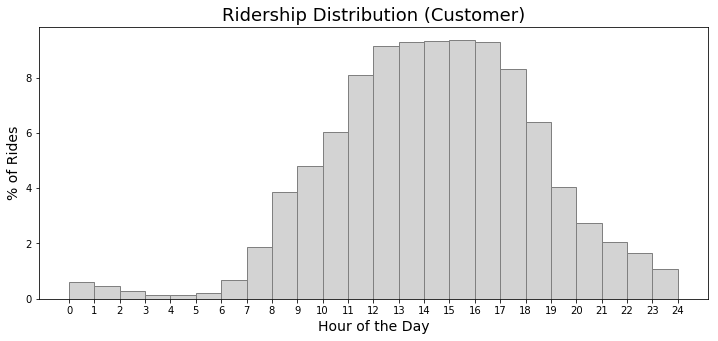

In [30]:
crit = (result.subscriber_type == 'Customer')
c = result[crit].copy()
c['total'] = (c['num_trips_subscribers'] / c['num_trips_subscribers'].sum() * 100).round(2)

plt.hist(c.the_hour, weights=c.total, bins=np.arange(0,25), facecolor='lightgray', edgecolor='gray')
plt.xticks(np.arange(0,25))
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('% of Rides', fontsize=14)
plt.title('Ridership Distribution (Customer)', fontsize=18)
plt.gca().grid(which='both', axis='vertical', linestyle='--')
plt.show()

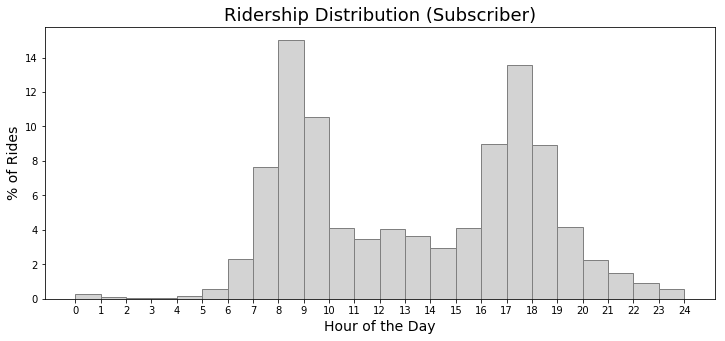

In [215]:
crit = result.subscriber_type == 'Subscriber'
c = result[crit].copy()
c['total'] = (c['num_trips_subscribers'] / c['num_trips_subscribers'].sum() * 100).round(2)

plt.hist(c.the_hour, weights=c.total, bins=np.arange(0,25), facecolor='lightgray', edgecolor='gray')
plt.xticks(np.arange(0,25))
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('% of Rides', fontsize=14)
plt.title('Ridership Distribution (Subscriber)', fontsize=18)
plt.gca().grid(which='both', axis='vertical', linestyle='--')
plt.show()

Peak times for ```Subscribers``` occur during the early morning and in the late afternoon, while for ```Customers``` usage is concentrated in the afternoon. One possibility of offer is to provide discounts for ```Customers``` when trips starts at the early morning. Another is to provide discounts for  ```Subscribers``` when trips occur from the late morning until the mid afternoon.

### Step 5

Besides the hours of use, another important aspect of consumer behavior to be understood to create personalized campaigns is how the duration of trips vary according to different regions and types of customers. The following query identifies the average trip duration, in minutes, for ```Customers``` and ```Subscribers``` in different cities.

```sql
#standardSQL
SELECT
  ROUND(AVG(trips.duration_sec)/60) AS avg_trip_duration,
  trips.subscriber_type,
  stations.landmark
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips` trips 
    INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations 
    ON trips.start_station_id = stations.station_id
GROUP BY
  trips.subscriber_type,
  landmark
```

In [31]:
# querying the duration of trips in each city by type of customer
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'SELECT ROUND(AVG(trips.duration_sec)/60) as avg_trip_duration, trips.subscriber_type, stations.landmark FROM `bigquery-public-data.san_francisco.bikeshare_trips` trips INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON trips.start_station_id = stations.station_id GROUP BY trips.subscriber_type, landmark' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r52e0dd8b10e62fab_000001640d8de3c3_1 ... (0s) Current status: DONE   

In [248]:
col_rename = {'avg_trip_duration':'Average Trip', 
              'subscriber_type': 'Pricing Option', 
              'landmark': 'City'} 
result = result.sort_values(by=['avg_trip_duration'], ascending=False)
result[result.subscriber_type == 'Customer'].rename(columns=col_rename)

,Average Trip,Pricing Option,City
2,152.0,Customer,Redwood City
1,128.0,Customer,Palo Alto
4,123.0,Customer,Mountain View
3,78.0,Customer,San Jose
0,56.0,Customer,San Francisco


In [244]:
result[result.subscriber_type == 'Subscriber'].rename(columns=col_rename)

,Average Trip,Pricing Option,City
9,15.0,Subscriber,Palo Alto
8,12.0,Subscriber,Redwood City
6,10.0,Subscriber,San Francisco
7,10.0,Subscriber,San Jose
5,9.0,Subscriber,Mountain View


The trip duration for subscribers is shorter and varies only a few minutes for the different regions, while for customers the trip duration is longer and the variation is wider. It is worth noting that the average trip of non subscribers is much higher than the 30-min offered in the day pass option, which suggests that this pricing strategy may not be aligned with the actual consumer behavior. In other terms, the demand for this option may not be relevant. 

In contrast to short subscriber rides that are probably correlated with people going or returning from work, longer customer trips may be correlated with leisure, tourism, or exercise. For this reason, offers could be customized to reach audiences with those types of interest. This type of offer could also attract new customers for the use of bicycles as a regular means of transportation.

### Step 6

Another aspect of consumer behavior, specific to ```Subscribers```, are the commuting routines and therefore it is important to identify the most popular routes. In the table below, the ratio indicates trips (returning / going) between two stations, and values closer to 1 indicate that most routes can be associated with commuters (greater frequency of round trips). This proxied value was used as it is not possible to analyze individual customers due to limitation of the dataset.

The city of San Frascisco was chosen for having a significantly larger number of consumers.

```sql
--- First, the query just creates a temp table (Routes) with the popular routes. It also joins 
--- with the stations table to get the landmark name. The table
--- contain two lines for each route (A as origin and B as destination, and B  as origin and 
--- A as destination).
--- Second, Route table is joinned with itself to identify the round trips (going = # of trips
--- from A to B, returning = # of trips from B to A). The ratio is simply a estimate measure 
--- of round trips.

#standardSQL
WITH Routes AS (
  SELECT
    COUNT(*) AS num_trips,
    trips.subscriber_type,
    trips.start_station_id,
    trips.start_station_name,
    a.landmark AS start_landmark,
    trips.end_station_id,
    trips.end_station_name,
    b.landmark AS end_landmark
  FROM
    `bigquery-public-data.san_francisco.bikeshare_trips` trips
    INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` a
    ON trips.start_station_id = a.station_id
    INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b
    ON trips.end_station_id = b.station_id
  WHERE
    subscriber_type = "Subscriber" AND
    b.landmark = "San Francisco"
  GROUP BY
    trips.subscriber_type,
    trips.start_station_id,
    trips.start_station_name,
    start_landmark,
    trips.end_station_id,
    trips.end_station_name,
    end_landmark
)
SELECT
  a.subscriber_type,
  a.num_trips going,
  b.num_trips return,
  round(b.num_trips/a.num_trips, 2) AS ratio,
  a.start_station_name,
  a.end_station_name,
  a.end_landmark
FROM
  Routes a
  INNER JOIN Routes b
  ON a.end_station_id = b.start_station_id AND b.end_station_id = a.start_station_id
WHERE
  a.start_station_id > a.end_station_id
```

In [44]:
# querying the most common commuter routes
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'WITH Routes AS ( SELECT COUNT(*) AS num_trips, trips.subscriber_type, trips.start_station_id, trips.start_station_name, a.landmark AS start_landmark, trips.end_station_id, trips.end_station_name, b.landmark AS end_landmark FROM `bigquery-public-data.san_francisco.bikeshare_trips` trips INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` a ON trips.start_station_id = a.station_id INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b ON trips.end_station_id = b.station_id WHERE subscriber_type = "Subscriber" AND b.landmark = "San Francisco" GROUP BY trips.subscriber_type, trips.start_station_id, trips.start_station_name, start_landmark, trips.end_station_id, trips.end_station_name, end_landmark ) SELECT a.subscriber_type, a.num_trips going, b.num_trips return, round(b.num_trips/a.num_trips, 2) as ratio, a.start_station_name, a.end_station_name, a.end_landmark FROM Routes a INNER JOIN Routes b ON a.end_station_id = b.start_station_id AND b.end_station_id = a.start_station_id WHERE a.start_station_id > a.end_station_id' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r29e8ad32e70ae6ea_000001640da98d4b_1 ... (0s) Current status: DONE   

In [50]:
cols = ['going', 'return','ratio','start_station_name','end_station_name']
col_rename = {'going': 'Trips (going)',
              'return':'Trips (returning)', 
              'ratio':'Ratio', 
              'start_station_name': 'Station A',
              'end_station_name':'Station B'}
result[cols] \
    .sort_values(by=['going','return'], ascending=False) \
    .rename(columns=col_rename) \
    .head(10)

,Trips (going),Trips (returning),Ratio,Station A,Station B
298,8305,6641,0.80,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th
738,6931,6332,0.91,2nd at Townsend,Harry Bridges Plaza (Ferry Building)
130,5758,4079,0.71,Steuart at Market,2nd at Townsend
742,5709,4980,0.87,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building)
774,5695,4182,0.73,Steuart at Market,San Francisco Caltrain (Townsend at 4th)
804,5089,5699,1.12,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale)
354,4919,5205,1.06,Market at Sansome,2nd at South Park
533,4367,6158,1.41,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom
368,4352,4281,0.98,San Francisco Caltrain 2 (330 Townsend),Powell Street BART
36,4298,3100,0.72,San Francisco Caltrain 2 (330 Townsend),5th at Howard


The most popular routes are associated with origins and destinations of the public transportation system (trains or ferries). Possibly, people use public transportation options to travel great distances and bikes to reach the final stop, or to change the type of transportation (from train to ferry and vice versa). This pattern in San Francisco also repeats for others cities. 

A possible advertising approach could be a personalized offer aimed at encouraging people to go cycling to work. Most travel is short for this type of client, as shown in step 4, so a communication strategy around wellness through short exercises could be effective as people would not need to change their routines too much.

### Step 7

An analysis similar to the previous step is intended for the ```Customers``` in the city of San Francisco. Ratios less close than 1 indicate that use is less associated with round trips. As previously seen, other information contributing to this view is the higher average trip time for non-subscribers as well as the concentration of afternoon trips.

In [2]:
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'WITH Routes AS ( SELECT COUNT(*) AS num_trips, trips.subscriber_type, trips.start_station_id, trips.start_station_name, a.landmark AS start_landmark, trips.end_station_id, trips.end_station_name, b.landmark AS end_landmark FROM `bigquery-public-data.san_francisco.bikeshare_trips` trips INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` a ON trips.start_station_id = a.station_id INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` b ON trips.end_station_id = b.station_id WHERE subscriber_type = "Customer" AND b.landmark = "San Francisco" GROUP BY trips.subscriber_type, trips.start_station_id, trips.start_station_name, start_landmark, trips.end_station_id, trips.end_station_name, end_landmark ) SELECT a.subscriber_type, a.num_trips going, b.num_trips return, round(b.num_trips/a.num_trips, 2) as ratio, a.start_station_name, a.end_station_name, a.end_landmark FROM Routes a INNER JOIN Routes b ON a.end_station_id = b.start_station_id AND b.end_station_id = a.start_station_id WHERE a.start_station_id > a.end_station_id' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r7271145302cd35f8_000001640e408af5_1 ... (0s) Current status: DONE   

In [3]:
cols = ['going', 'return','ratio','start_station_name','end_station_name']
col_rename = {'going': 'Trips (going)',
              'return':'Trips (returning)', 
              'ratio':'Ratio', 
              'start_station_name': 'Station A',
              'end_station_name':'Station B'}
result[cols] \
    .sort_values(by=['going','return'], ascending=False) \
    .rename(columns=col_rename) \
    .head(10)

,Trips (going),Trips (returning),Ratio,Station A,Station B
90,1638,3667,2.24,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building)
148,868,420,0.48,Harry Bridges Plaza (Ferry Building),Embarcadero at Vallejo
75,847,674,0.80,Steuart at Market,Embarcadero at Sansome
9,770,701,0.91,Market at 4th,Embarcadero at Sansome
39,689,556,0.81,2nd at Townsend,Harry Bridges Plaza (Ferry Building)
55,636,420,0.66,Market at Sansome,Embarcadero at Sansome
117,619,576,0.93,Powell at Post (Union Square),Embarcadero at Sansome
7,613,476,0.78,Market at 4th,Harry Bridges Plaza (Ferry Building)
86,608,1345,2.21,Embarcadero at Sansome,Embarcadero at Vallejo
33,546,583,1.07,2nd at Townsend,Embarcadero at Sansome


In San Francisco, most of the non-subscriber's routes may be related to ferry / boat transportation or to city attractions/main places which are closer to the bay. This point bear out the previous discussion around targeting tourism and leisure offers.

### Step 8

Lastly, after identifying possible consumer behaviors towards biking, as was done in the previous sections, the following analysis focuses on stations themselves. Specifically, the aim is to investigate if there is a shortage of bikes that could lead to loss of income and, consequently, that this issue becomes a barrier to increase ridership. The status table contains logs by minute for each stations and, even though there are just a few missing minutes, this fact does not represent an issue for the analysis.

The criterion considered for low availability was no bikes available or only one bike available at the station at a given time. The table shows the number of incidences (in thousands) for each station in which there were low availability of bikes by city by day of the week.

```sql
#standardSQL
WITH UnavailableBikesByStation AS
(
  SELECT
    station_id,
    COUNT(*) AS num_obs,
    EXTRACT(DAYOFWEEK FROM time) AS day_of_week
  FROM
    `bigquery-public-data.san_francisco.bikeshare_status`
  WHERE
    bikes_available IN (0,1)
  GROUP BY
    station_id,
    day_of_week
  ORDER BY
    station_id, num_obs DESC, day_of_week
)
SELECT  
  b.landmark,
  b.name,
  ROUND(SUM(CASE WHEN day_of_week = 1   THEN num_obs END)/1000, 1) AS Sunday, 
  ROUND(SUM(CASE WHEN day_of_week = 2   THEN num_obs END)/1000, 1) AS Monday, 
  ROUND(SUM(CASE WHEN day_of_week = 3   THEN num_obs END)/1000, 1) AS Tuesday,
  ROUND(SUM(CASE WHEN day_of_week = 4   THEN num_obs END)/1000, 1) AS Wednesday,
  ROUND(SUM(CASE WHEN day_of_week = 5   THEN num_obs END)/1000, 1) AS Thursday,
  ROUND(SUM(CASE WHEN day_of_week = 6   THEN num_obs END)/1000, 1) AS Friday,
  ROUND(SUM(CASE WHEN day_of_week = 7   THEN num_obs END)/1000, 1) AS Saturday
FROM
  UnavailableBikesByStation AS a
INNER JOIN 
  `bigquery-public-data.san_francisco.bikeshare_stations` AS b
  ON a.station_id = b.station_id
WHERE
  -- the query was taking too long, so the stations where hardcoded 
  a.station_id IN (70,69,50,60,61,77,74,65,55,76,28,27,34,35,22,25,2,4) 
GROUP BY 
  a.station_id, 
  b.landmark,
  b.name  
```

In [4]:
! bq query --use_legacy_sql=FALSE --max_rows=1000 --format=csv 'WITH UnavailableBikesByStation AS ( SELECT station_id, count(*) AS num_obs, EXTRACT(DAYOFWEEK FROM time) as day_of_week FROM `bigquery-public-data.san_francisco.bikeshare_status` WHERE bikes_available IN (0,1) GROUP BY station_id, day_of_week ORDER BY station_id, num_obs DESC, day_of_week ) SELECT b.landmark, b.name, ROUND(SUM(CASE WHEN day_of_week = 1   THEN num_obs END)/1000, 1) AS Sunday, ROUND(SUM(CASE WHEN day_of_week = 2   THEN num_obs END)/1000, 1) AS Monday, ROUND(SUM(CASE WHEN day_of_week = 3   THEN num_obs END)/1000, 1) AS Tuesday, ROUND(SUM(CASE WHEN day_of_week = 4   THEN num_obs END)/1000, 1) AS Wednesday, ROUND(SUM(CASE WHEN day_of_week = 5   THEN num_obs END)/1000, 1) AS Thursday, ROUND(SUM(CASE WHEN day_of_week = 6   THEN num_obs END)/1000, 1) AS Friday, ROUND(SUM(CASE WHEN day_of_week = 7   THEN num_obs END)/1000, 1) AS Saturday FROM UnavailableBikesByStation AS a INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS b ON a.station_id = b.station_id WHERE a.station_id IN (70,69,50,60,61,77,74,65,55,76,28,27,34,35,22,25,2,4) GROUP BY a.station_id, b.landmark, b.name' > result.csv
result = pd.read_csv('result.csv')

Waiting on bqjob_r43d4611688b2b590_000001640e5cbeed_1 ... (2s) Current status: DONE   

In [8]:
col_rename = {'landmark': 'City',
              'name':'Station Name'}
crit = result.landmark == 'San Francisco'
result[crit].sort_values(by=['name']).rename(columns=col_rename).head(10)

,City,Station Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
15,San Francisco,2nd at Townsend,1.1,3.7,2.4,2.7,3.4,2.6,2.3
17,San Francisco,Embarcadero at Sansome,7.4,12.0,15.1,14.8,12.0,10.8,7.9
8,San Francisco,Harry Bridges Plaza (Ferry Building),1.4,7.4,7.3,7.2,5.7,7.9,1.2
10,San Francisco,Market at 4th,2.7,6.6,16.1,16.2,17.5,13.5,4.2
11,San Francisco,Market at Sansome,1.9,2.1,1.3,2.1,2.0,2.3,2.4
14,San Francisco,San Francisco Caltrain (Townsend at 4th),0.3,15.1,14.2,14.8,14.0,12.3,0.7
9,San Francisco,San Francisco Caltrain 2 (330 Townsend),0.2,11.6,9.5,10.4,9.4,9.6,0.4
13,San Francisco,Steuart at Market,0.5,7.0,5.7,5.4,6.8,5.5,0.8
16,San Francisco,Temporary Transbay Terminal (Howard at Beale),0.4,7.4,8.6,7.1,8.7,7.4,0.3
12,San Francisco,Townsend at 7th,3.6,10.1,10.7,9.1,9.7,7.1,2.5


In [11]:
crit = result.landmark != 'San Francisco'
result[crit].sort_values(by=['landmark','name']).rename(columns=col_rename).head(10)

,City,Station Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
7,Mountain View,Mountain View Caltrain Station,0.6,1.6,0.9,2.2,3.5,2.6,0.2
6,Mountain View,Mountain View City Hall,6.4,4.9,7.2,6.3,4.7,5.9,8.3
2,Palo Alto,Palo Alto Caltrain Station,1.6,2.0,1.8,2.8,2.0,3.6,2.8
3,Palo Alto,University and Emerson,4.9,4.4,0.3,0.6,0.7,1.8,2.6
4,Redwood City,Redwood City Caltrain Station,0.7,2.0,2.2,2.9,1.5,2.8,2.7
5,Redwood City,Stanford in Redwood City,1.0,1.7,3.3,1.5,2.1,2.2,2.0
1,San Jose,San Jose Diridon Caltrain Station,0.1,1.5,2.9,1.7,2.3,2.3,1.6
0,San Jose,Santa Clara at Almaden,3.6,7.7,12.1,9.9,10.3,8.9,8.9


Some of the busiest stations, presented in the analysis of the 2nd step, have problems of low availability of bikes. Unavailability is concentrated in work days with only a few stations having problems in weekends.

## Conclusion

There are clear opportunities for offers that could lead to an increase in the number of passengers. Additional demographic analysis could be done in cities, other than San Francisco, in order to identify if the low use is in fact correlated to the lower demand or to the lack of stations.

Bikes shortages can be an inhibitor for frequent or non-frequent users, who could stop using the service, or for customers who would not consider bikes as a regular transportation means. Additionally, further research is needed to identify whether the return on investment associated with increasing bicycles is justifiable, considering peak and off peak demand.

One important problem that should be addressed is the lack of data to individually identify each customer and therefore the creation of personalized offers. Knowledge of individual behaviors can lead to more specific insights and greater effectiveness of marketing campaigns.